In [19]:
import paddle
import paddle.nn.functional as F
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pylab import subplots_adjust
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from utils.metric import *
from models.ucloudnet import UCloudNet

In [4]:
# Configuration
DATASET_PATH = './dataset/SWINySEG'
DATASET_SPLIT = 'all'

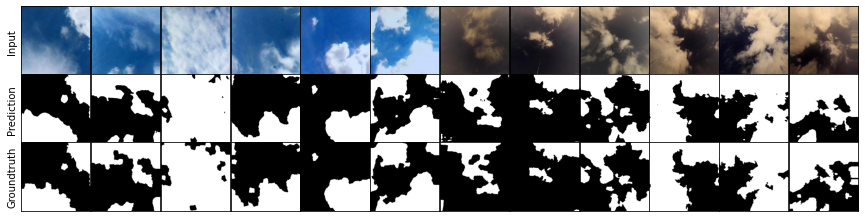

In [78]:
# test on UCloudNet (k=4, aux, lr decay)
img_path = './dataset/SWINySEG/images'
gt_path = './dataset/SWINySEG/GTmaps'

model = UCloudNet(3, 4, 2, 'test')

state_dict = paddle.load("./weights/ucloudnet_k_4_aux_lr_decay_epochs_100.pdparam")
model.set_state_dict(state_dict)
model.eval()  

n_images = 12
images_names = [
    'd0625_2.jpg', 'd0659_5.jpg', 'd1007_1.jpg', 'd0698_5.jpg', 'd0095_2.jpg', 'd0857_4.jpg',
    'n0023_4.jpg', 'n0071_1.jpg', 'n0111.jpg', 'n0086_4.jpg', 'n0057_5.jpg', 'n0049_4.jpg']

plt.figure(figsize=(15, 15))
i = 1
for item in images_names:
    ax = plt.subplot(3, n_images, i)
    if (i-1) % n_images == 0:
        ax.set_ylabel('Input')
    img = Image.open(
        os.path.join(img_path, images_names[(i-1) % n_images])).resize((304, 304))
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
for item in images_names:
    ax = plt.subplot(3, n_images, i)
    if (i-1) % n_images == 0:
        ax.set_ylabel('Prediction')
    img = Image.open(
        os.path.join(img_path, images_names[(i-1) % n_images])).resize((304, 304))
    img_tensor = paddle.to_tensor(
        np.array(img).transpose(2, 0, 1).reshape((1, 3, 304, 304))).astype('float32') / 255
    pred = model(img_tensor)
    pred = (F.sigmoid(pred)>0.5).astype('int64')
    pred = Image.fromarray(np.uint8(pred.numpy().reshape((304, 304))) * 255)
    plt.imshow(pred, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    i += 1
for item in images_names:
    ax = plt.subplot(3, n_images, i)
    if (i-1) % n_images == 0:
        ax.set_ylabel('Groundtruth')
    gt = Image.open(
        os.path.join(
            gt_path, 
            images_names[(i-1) % n_images].split(".")[0]+".png")).resize((304, 304))
    plt.imshow(gt, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    i += 1

plt.subplots_adjust(wspace=0.01, hspace=-0.9)
plt.savefig('./results/test_pred.svg', format='svg', bbox_inches='tight')
plt.show()
# left=0.6, top=0.6, right=1.7, bottom=0.1, 

In [8]:
# P, R values (UCloudNet k=2, aux, lr decay)
p1, r1 = get_pr_curve(
    UCloudNet(3, 2, 2),
    "./weights/ucloudnet_k_2_aux_lr_decay_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)

[0.1%]: [                    ] 

D:\Software\Anaconda3\envs\paddle\lib\site-packages\paddle\fluid\dygraph\math_op_patch.py:251: UserWarning: The dtype of left and right variables are not the same, left dtype is paddle.float32, but right dtype is paddle.int32, the right dtype will convert to paddle.float32
  warnings.warn(
D:\Software\Anaconda3\envs\paddle\lib\site-packages\paddle\fluid\dygraph\math_op_patch.py:251: UserWarning: The dtype of left and right variables are not the same, left dtype is paddle.int32, but right dtype is paddle.float32, the right dtype will convert to paddle.int32
  warnings.warn(


[100.0%]: [####################] 


In [9]:
# P, R values (UCloudNet k=4, aux, lr decay)
p2, r2 = get_pr_curve(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_aux_lr_decay_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)

[100.0%]: [####################] 


In [10]:
# P, R values (UCloudNet k=4, lr decay)
p3, r3 = get_pr_curve(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_lr_decay_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)

[100.0%]: [####################] 


In [11]:
# P, R values (UCloudNet k=4)
p4, r4 = get_pr_curve(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)

[100.0%]: [####################] 


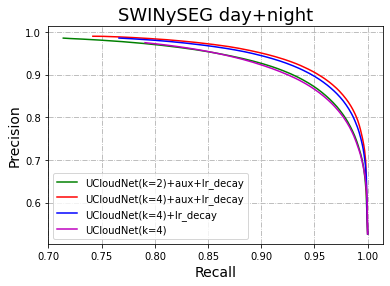

In [12]:
# P-R curve
l1, = plt.plot(r1, p1, c='g')
l2, = plt.plot(r2, p2, c='r')
l3, = plt.plot(r3, p3, c='b')
l4, = plt.plot(r4, p4, c='m')

plt.grid(linestyle='-.')
plt.title('SWINySEG day+night',fontsize=18)
plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)

plt.legend(
    handles=[l1, l2, l3, l4], 
    labels=[
        'UCloudNet(k=2)+aux+lr_decay', 
        'UCloudNet(k=4)+aux+lr_decay', 
        'UCloudNet(k=4)+lr_decay', 
        'UCloudNet(k=4)'], 
    loc='lower left')

plt.savefig('./results/pr_curve.svg', format='svg')

plt.show()

In [16]:
# TPR, FPR values (UCloudNet k=2, aux, lr decay)
tpr1, fpr1 = get_roc_curve(
    UCloudNet(3, 2, 2), 
    "./weights/ucloudnet_k_2_aux_lr_decay_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)

[0.1%]: [                    ] 

D:\Software\Anaconda3\envs\paddle\lib\site-packages\paddle\fluid\dygraph\math_op_patch.py:251: UserWarning: The dtype of left and right variables are not the same, left dtype is paddle.float32, but right dtype is paddle.int32, the right dtype will convert to paddle.float32
  warnings.warn(
D:\Software\Anaconda3\envs\paddle\lib\site-packages\paddle\fluid\dygraph\math_op_patch.py:251: UserWarning: The dtype of left and right variables are not the same, left dtype is paddle.int32, but right dtype is paddle.float32, the right dtype will convert to paddle.int32
  warnings.warn(


[100.0%]: [####################] 


In [17]:
# TPR, FPR values (UCloudNet k=4, aux, lr decay)
tpr2, fpr2 = get_roc_curve(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_aux_lr_decay_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)

[100.0%]: [####################] 


In [18]:
# TPR, FPR values (UCloudNet k=4, lr decay)
tpr3, fpr3 = get_roc_curve(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_lr_decay_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)

[100.0%]: [####################] 


In [19]:
# TPR, FPR values (UCloudNet k=4)
tpr4, fpr4 = get_roc_curve(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)

[100.0%]: [####################] 


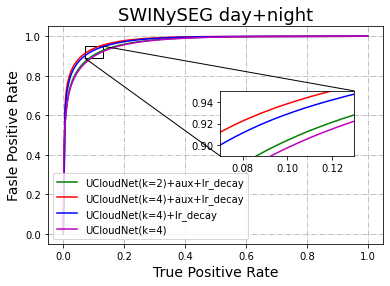

In [26]:
# ROC curve
fig, ax = plt.subplots(1, 1)
l1, = ax.plot(fpr1, tpr1, c='g')
l2, = ax.plot(fpr2, tpr2, c='r')
l3, = ax.plot(fpr3, tpr3, c='b')
l4, = ax.plot(fpr4, tpr4, c='m')

plt.grid(linestyle='-.')
plt.title('SWINySEG day+night',fontsize=18)
plt.xlabel('True Positive Rate',fontsize=14)
plt.ylabel('Fasle Positive Rate',fontsize=14)

plt.legend(
    handles=[l1, l2, l3, l4], 
    labels=[
        'UCloudNet(k=2)+aux+lr_decay', 
        'UCloudNet(k=4)+aux+lr_decay', 
        'UCloudNet(k=4)+lr_decay', 
        'UCloudNet(k=4)'], 
    loc='lower left')

axins = inset_axes(ax, width="40%", height="30%",loc='lower left',
                   bbox_to_anchor=(0.5, 0.38, 1, 1),
                   bbox_transform=ax.transAxes)

l1, = axins.plot(fpr1, tpr1, c='g')
l2, = axins.plot(fpr2, tpr2, c='r')
l3, = axins.plot(fpr3, tpr3, c='b')
l4, = axins.plot(fpr4, tpr4, c='m')

axins.set_xlim(0.07, 0.13)
axins.set_ylim(0.89, 0.95)

mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec='k', lw=1)

plt.savefig('./results/roc_curve.svg', format='svg')

plt.show()

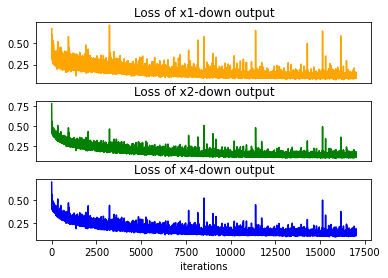

In [30]:
# Loss curve (UCloudNet (k=4, aux, lr decay))
ucloudnet_k_4_aux_lr_decay_train_rec = pd.read_csv(
    "./results/ucloudnet_k_4_aux_lr_decay_train_log.csv")

train_loss_rec = ucloudnet_k_4_aux_lr_decay_train_rec['loss'].to_list()
train_x1loss_rec = ucloudnet_k_4_aux_lr_decay_train_rec['x1_loss'].to_list()
train_x2loss_rec = ucloudnet_k_4_aux_lr_decay_train_rec['x2_loss'].to_list()
train_x4loss_rec = ucloudnet_k_4_aux_lr_decay_train_rec['x4_loss'].to_list()

plt.figure()
subplots_adjust(hspace=0.3)
ax = plt.subplot(3, 1, 1)
plt.title("Loss of x1-down output")
ax.plot(train_x1loss_rec, c='orange')
plt.xticks([])
ax = plt.subplot(3, 1, 2)
plt.title("Loss of x2-down output")
ax.plot(train_x2loss_rec, c='green')
plt.xticks([])
ax = plt.subplot(3, 1, 3)
plt.title("Loss of x4-down output")
ax.plot(train_x4loss_rec, c='blue')
plt.xlabel("iterations")

plt.savefig('./results/loss_curve.svg', format='svg')
plt.show()


In [7]:
# Metrics

# U-Net (k=2, aux, lr decay)
precision, recall, f_measure, error_rate = get_metrics(
    UCloudNet(3, 2, 2), 
    "./weights/ucloudnet_k_2_aux_lr_decay_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)
print("UCloudNet (k=2, aux, lr decay)")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-measure", f_measure)
print("Error-rate", error_rate)

[100.0%]: [####################] 
UCloudNet (k=2, aux, lr decay)
Precision:  0.9073669910430908
Recall:  0.9221030473709106
F-measure 0.9146757125854492
Error-rate 0.07784879207611084


In [6]:
# UCloudNet (k=4, aux, lr decay)
precision, recall, f_measure, error_rate = get_metrics(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_aux_lr_decay_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)
print("UCloudNet (k=4, aux, lr decay)")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-measure", f_measure)
print("Error-rate", error_rate)

[100.0%]: [####################] 
UCloudNet (k=4, aux, lr decay)
Precision:  0.9214843511581421
Recall:  0.9365151524543762
F-measure 0.9289389252662659
Error-rate 0.06236875057220459


In [5]:
# UCloudNet (k=4, lr decay)
precision, recall, f_measure, error_rate = get_metrics(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_lr_decay_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)
print("UCloudNet (k=4, lr decay)")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-measure", f_measure)
print("Error-rate", error_rate)

[100.0%]: [####################] 
UCloudNet (k=4, lr decay)
Precision:  0.9089376926422119
Recall:  0.9401929974555969
F-measure 0.9243012070655823
Error-rate 0.06819963455200195


In [4]:
# UCloudNet (k=4)
precision, recall, f_measure, error_rate = get_metrics(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)
print("UCloudNet (k=4)")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-measure", f_measure)
print("Error-rate", error_rate)

[0.4%]: [                    ] 

D:\Software\Anaconda3\envs\paddle\lib\site-packages\paddle\fluid\dygraph\math_op_patch.py:251: UserWarning: The dtype of left and right variables are not the same, left dtype is paddle.int32, but right dtype is paddle.float32, the right dtype will convert to paddle.int32
  warnings.warn(


[100.0%]: [####################] 
UCloudNet (k=4)
Precision:  0.920143187046051
Recall:  0.9029417037963867
F-measure 0.9114612936973572
Error-rate 0.08221101760864258


In [3]:
# Configuration
DATASET_SPLIT = 'd'

In [4]:
# UCloudNet (k=2)
precision, recall, f_measure, error_rate = get_metrics(
    UCloudNet(3, 2, 2), 
    "./weights/ucloudnet_k_2_aux_lr_decay_d_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)
print("UCloudNet (k=2)")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-measure", f_measure)
print("Error-rate", error_rate)

[0.2%]: [                    ] 

D:\Software\Anaconda3\envs\paddle\lib\site-packages\paddle\fluid\dygraph\math_op_patch.py:251: UserWarning: The dtype of left and right variables are not the same, left dtype is paddle.int32, but right dtype is paddle.float32, the right dtype will convert to paddle.int32
  warnings.warn(


[100.0%]: [####################] 
UCloudNet (k=2)
Precision:  0.9050559997558594
Recall:  0.9343112111091614
F-measure 0.9194509387016296
Error-rate 0.07385295629501343


In [5]:
# UCloudNet (k=4)
precision, recall, f_measure, error_rate = get_metrics(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_aux_lr_decay_d_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)
print("UCloudNet (k=4)")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-measure", f_measure)
print("Error-rate", error_rate)

[100.0%]: [####################] 
UCloudNet (k=4)
Precision:  0.9195603728294373
Recall:  0.9420258402824402
F-measure 0.9306575655937195
Error-rate 0.06201833486557007


In [6]:
# Configuration
DATASET_SPLIT = 'n'

In [7]:
# UCloudNet (k=2)
precision, recall, f_measure, error_rate = get_metrics(
    UCloudNet(3, 2, 2), 
    "./weights/ucloudnet_k_2_aux_lr_decay_n_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)
print("UCloudNet (k=2)")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-measure", f_measure)
print("Error-rate", error_rate)

[100.0%]: [####################] 
UCloudNet (k=2)
Precision:  0.9176580905914307
Recall:  0.9359123110771179
F-measure 0.9266952872276306
Error-rate 0.058538973331451416


In [8]:
# UCloudNet (k=4)
precision, recall, f_measure, error_rate = get_metrics(
    UCloudNet(3, 4, 2), 
    "./weights/ucloudnet_k_4_aux_lr_decay_n_epochs_100.pdparam",
    DATASET_PATH,
    DATASET_SPLIT)
print("UCloudNet (k=4)")
print("Precision: ", precision)
print("Recall: ", recall)
print("F-measure", f_measure)
print("Error-rate", error_rate)

[100.0%]: [####################] 
UCloudNet (k=4)
Precision:  0.9456727504730225
Recall:  0.9451018571853638
F-measure 0.9453871846199036
Error-rate 0.04250413179397583
